In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Restaurant_Reviews (1).tsv',delimiter='\t',quoting=3)
#quoting=3 tells pandas to ignore all the quotes during the reading process
#delimiter needed since it's tab seperated values

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Data Preprocessing

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# from nltk.stem.porter import PorterStemmer # Porter stemmer is type of stemmer used for data mining and information retrieval
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords=set(ENGLISH_STOP_WORDS)-set(["not"])
nltk_stopwords=set(stopwords.words('english'))-set(["not"])
combined_stopwords=sklearn_stopwords.union(nltk_stopwords)

In [ ]:
corpus=[]
for i in range(0,1000):
  review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])
  review=review.lower()
  review_words=review.split()
  review_words=[word for word in review_words if not word in combined_stopwords]
  lem=WordNetLemmatizer()
  reviewRes=[lem.lemmatize(word) for word in review_words]
  review=' '.join(reviewRes)
  corpus.append(review)

In [ ]:
#creating Bag of Words model and trying to find max_features using unique words
from sklearn.feature_extraction.text import CountVectorizer
cv_full=CountVectorizer()
X_full=cv_full.fit_transform(corpus)
print(X_full.shape)
#1000 reviews and 1663 unique words

(1000, 1663)


In [ ]:
import numpy as np

# Sum up the occurrences of each word
word_counts = np.asarray(X_full.sum(axis=0)).flatten()
#axis=0 sums word occurence column by column
#np.asarray() converts it into array
#flatten squashes it into 1 dimension list example 1 row N columns[[150,200]]->[150,200]
#countVectorizer returns a sparse matrix(stores non-zero values)->converted to np.asarray() which removes
# matrix wrapper and makes it flexible standard array(which can become 1D list using flatten)->[[150,200]]

# Sort them to see the distribution
word_counts.sort()
# Look at the most frequent vs least frequent
word_counts

array([  1,   1,   1, ..., 111, 116, 127])

Max features based on total unique count

Total Unique Words,Suggested max_features,Reasoning

"< 1,000",None (Keep all),The dataset is small enough that every word might matter.

"1,000 - 3,000","1,000 to 1,500",Removes typos and words that only appear in a single review.

"10,000+","2,000 to 5,000",Keeps the matrix size manageable for your RAM/Processor.

In [ ]:
#creating Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=df.iloc[:,1].values #: select all rows,1 select column index 1(2nd column)

Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#random-state sets same seed to the random generator,so train-test splits are always deterministic
# test_size=1000*0.2=200
# train_size=1000*0.8=800

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Model Training

Multinomial Naves Bayes: This is probabilistic learning model mostly used in NLP, which predicts tag of a text such as piece of email or newspaper article

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#MultinomialNB is suitable for classification with discrete features (word-count for text classification)

classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score_acc=accuracy_score(y_test,y_pred)
score_prec=precision_score(y_test,y_pred)
score_rec=recall_score(y_test,y_pred)

print("Accuracy score is {}%".format(round(score_acc*100,2)))
print("Precision score is {}%".format(round(score_prec*100,2)))
print("Recall score is {}%".format(round(score_rec*100,2)))

Accuracy score is 79.5%
Precision score is 79.81%
Recall score is 80.58%


In [ ]:
from sklearn.metrics import confusion_matrix
#confusion is used to visualize the performance of the classification
cm=confusion_matrix(y_test,y_pred)
cm
# TP FN
# FP TN

array([[76, 21],
       [20, 83]])

Text(95.72222222222221, 0.5, 'Actual values')

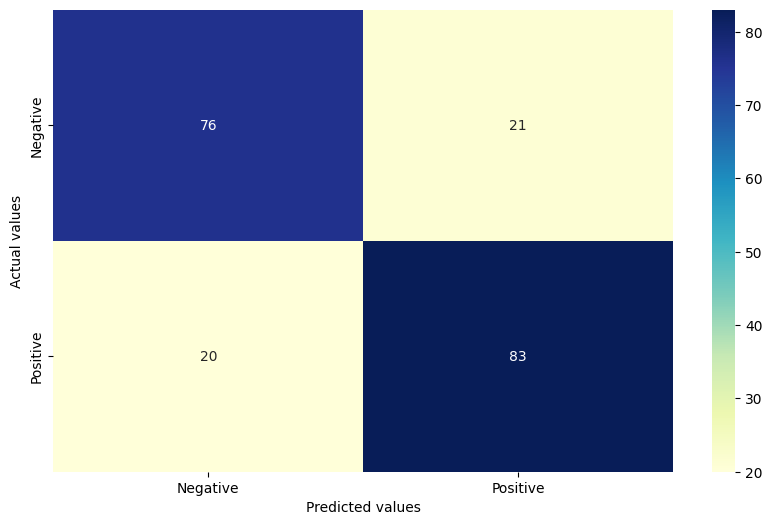

In [ ]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#sklearn sorts labels in ascending order x->0 1 y->0 1
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [ ]:
#hyperparameter tuning
alpha_val=0.0
best_accuracy=0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier=MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_pred=temp_classifier.predict(X_test)
  score_accuracy=accuracy_score(y_test,temp_pred)

  if score_accuracy>best_accuracy:
    best_accuracy=score_accuracy
    alpha_val=i

  print("Accuracy score for alpha {} is {}%".format(round(i,1),round(score_accuracy*100,2)))
print("Best Accuracy score for alpha {} is {}%".format(round(alpha_val,1),round(best_accuracy*100,2)))

Accuracy score for alpha 0.1 is 78.5%
Accuracy score for alpha 0.2 is 78.5%
Accuracy score for alpha 0.3 is 79.0%
Accuracy score for alpha 0.4 is 78.5%
Accuracy score for alpha 0.5 is 78.5%
Accuracy score for alpha 0.6 is 78.0%
Accuracy score for alpha 0.7 is 79.0%
Accuracy score for alpha 0.8 is 79.0%
Accuracy score for alpha 0.9 is 79.5%
Accuracy score for alpha 1.0 is 79.5%
Best Accuracy score for alpha 0.9 is 79.5%


In [ ]:
best_classifier=MultinomialNB(alpha=0.9)
best_classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.9)

Predictions

In [ ]:
def sentiment_analysis(sample_review):
  sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
  sample_review=sample_review.lower()
  sample_review_words=sample_review.split()
  sample_review_words=[word for word in sample_review_words if not word in combined_stopwords]
  lem=WordNetLemmatizer()
  final_review=[lem.lemmatize(word) for word in sample_review_words]
  final_review=' '.join(final_review)

  temp=cv.transform([final_review]).toarray() #puts final_review in a list since sklearn expects a list
  return best_classifier.predict(temp)

In [ ]:
sample_review='The food was good'
if sentiment_analysis(sample_review):
  print("Positive Sentiment")
else:
  print("Negative Sentiment")


Positive Sentiment


In [ ]:
sample_review='Food was pretty bad and the service was very slow.'
if sentiment_analysis(sample_review):
  print("Positive Sentiment")
else:
  print("Negative Sentiment")

Negative Sentiment


In [ ]:
sample_review='The food was absolutely wonderful, from preparation to presentation, very pleasing.'
if sentiment_analysis(sample_review):
  print("Positive Sentiment")
else:
  print("Negative Sentiment")

Positive Sentiment


In [ ]:
sample_review='The food is really bad.'
if sentiment_analysis(sample_review):
  print("Positive Sentiment")
else:
  print("Negative Sentiment")

Negative Sentiment
